In [23]:
import assign03 as a3
import comp03 as c3

import matplotlib.pyplot as plt 
import numpy as np 
import skimage as sk 
import skimage.io as skio 
import skimage.transform as sktr 
import skimage.filters as skfl 
import skimage.feature as skft 
import skimage.color as skcol 
import skimage.exposure as skexp 
import skimage.morphology as skmr 
import scipy.ndimage as ndimage

from importlib import reload
reload(c3)

%matplotlib inline

### Fourier Transform

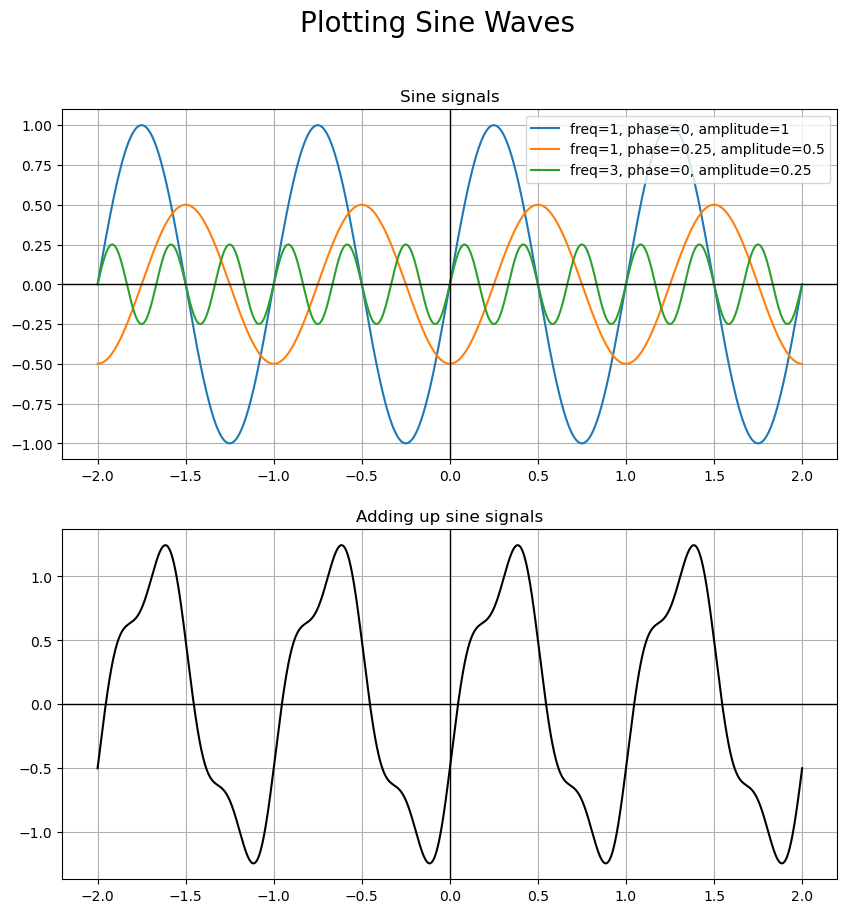

In [24]:
fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle("Plotting Sine Waves", fontsize=20)

FS = 10007
DOMAIN = [-2, 2]
x = np.linspace(DOMAIN[0], DOMAIN[1], 2*FS)

ax[0].set_title("Sine signals")
ax[0].plot(x, a3.sin2(x, 1, 0, 1), label="freq=1, phase=0, amplitude=1")
ax[0].plot(x, a3.sin2(x, 1, 0.25, 0.5), label="freq=1, phase=0.25, amplitude=0.5")
ax[0].plot(x, a3.sin2(x, 3, 0, 0.25), label="freq=3, phase=0, amplitude=0.25")
ax[0].axhline(linewidth=1, color="k")
ax[0].axvline(linewidth=1, color="k")
ax[0].legend(loc="upper right")
ax[0].grid(True)

yAll = a3.sin2(x, 1, 0, 1)  + a3.sin2(x, 1, 0.25, 0.5) + a3.sin2(x, 3, 0, 0.25)
ax[1].set_title("Adding up sine signals")
ax[1].plot(x, yAll, color="black")
ax[1].axhline(linewidth=1, color="k")
ax[1].axvline(linewidth=1, color="k")
ax[1].grid(True)

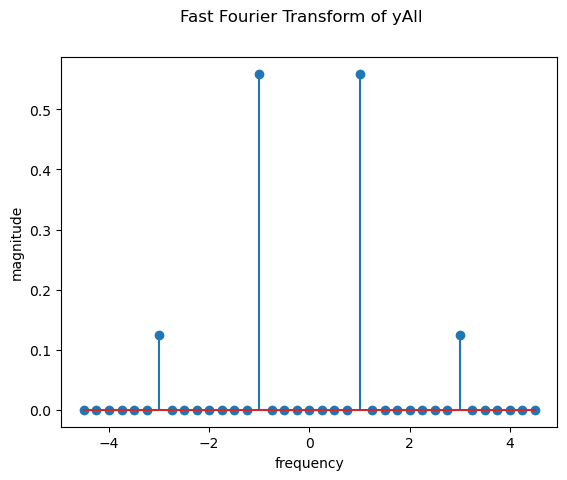

In [25]:
freqArray, spMag, spPhase = a3.fft1D(x, yAll)
range = 18
x_plot = freqArray[int(len(freqArray)/2) - range: int(len(freqArray)/2) + range + 1]
y_plot = spMag[int(len(freqArray)/2) - range: int(len(freqArray)/2) + range + 1]

fig, ax = plt.subplots()
ax.set_xlabel("frequency")
ax.set_ylabel("magnitude")
fig.suptitle("Fast Fourier Transform of yAll")
ax.stem(x_plot, y_plot);

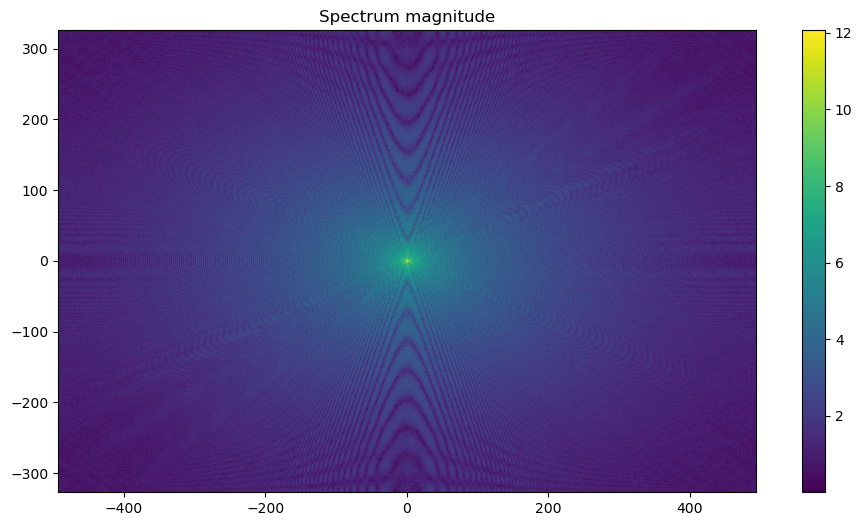

In [26]:
imgRet68 = skio.imread("data/data/68_left.jpeg")
imgRet68 = skcol.rgb2gray(imgRet68)
imgRet68 = sktr.rescale(imgRet68, 0.2)
a3.plotFFT2d(imgRet68)

### Convolution and Edge Detection

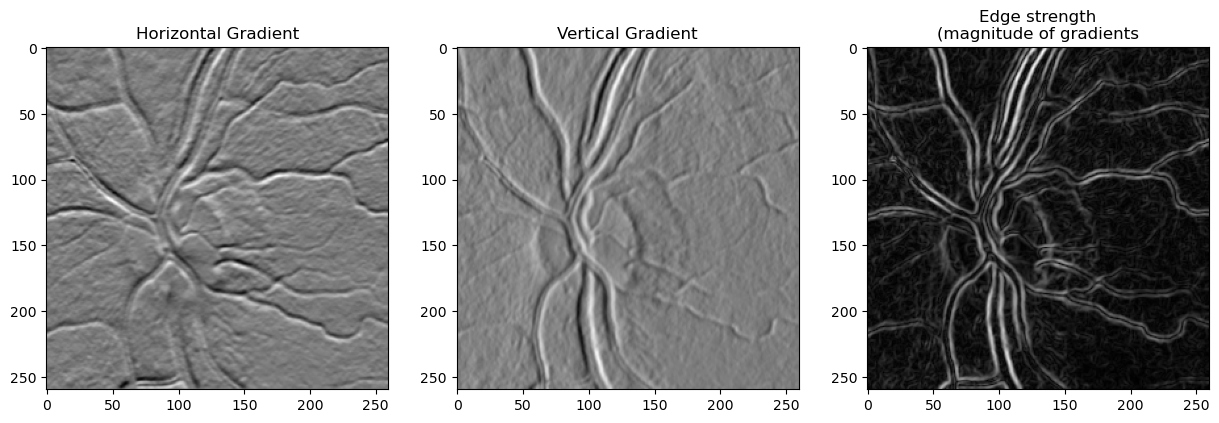

In [27]:
borderPx = int(imgRet68.shape[0] * 0.20) 
x_coord, y_coord = 313, 357
imONest = imgRet68[x_coord - borderPx:x_coord + borderPx, y_coord - borderPx:y_coord + borderPx]
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

im_h, im_v = skfl.sobel_h(imONest), skfl.sobel_v(imONest)
im_e = np.sqrt(np.square(im_h) + np.square(im_v))

list_ax_plot = [(im_h, "Horizontal Gradient"), (im_v, "Vertical Gradient"), (im_e, "Edge strength\n(magnitude of gradients")]
for i in [0, 1, 2]:
    ax[i].imshow(list_ax_plot[i][0], cmap="gray")
    ax[i].set_title(list_ax_plot[i][1])

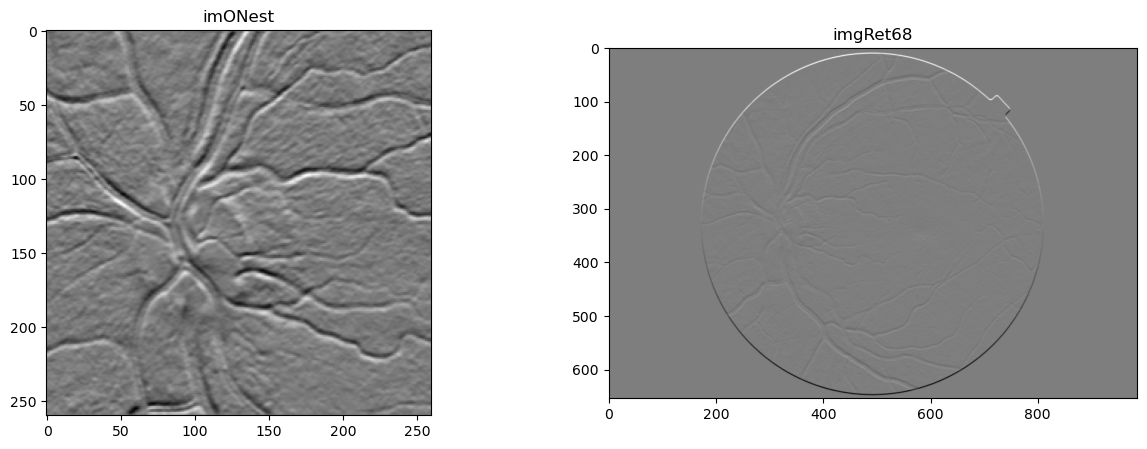

In [28]:
sobelHfilt = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])/4.0
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
im_sobel_manual_h = ndimage.convolve(imONest, sobelHfilt)
im_sobel_manual_h0 = ndimage.convolve(imgRet68, sobelHfilt)
ax[0].imshow(im_sobel_manual_h, cmap="gray")
ax[0].set_title("imONest")
ax[1].set_title("imgRet68")
ax[1].imshow(im_sobel_manual_h0, cmap="gray")

In [29]:
if np.array_equal(im_sobel_manual_h, im_h):
    print(f"The images 'im_sobel_manual_h' and 'im_h' are identical")
else:
    print(f"The images 'im_sobel_manual_h' and 'im_h' are NOT identical")

The images 'im_sobel_manual_h' and 'im_h' are identical


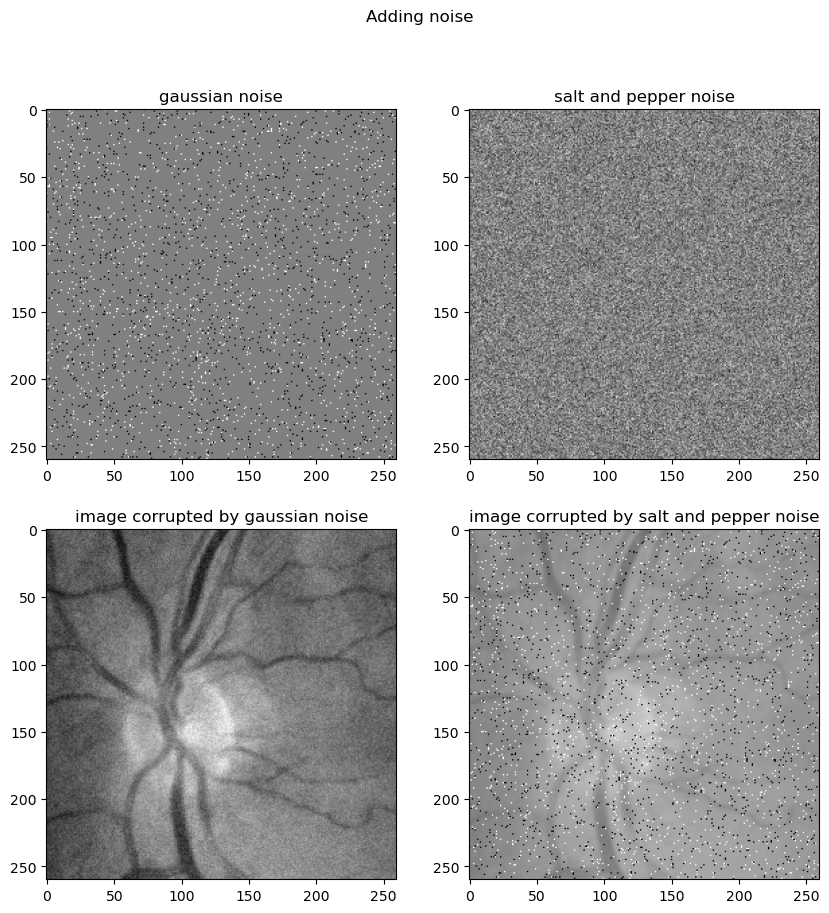

In [49]:
noiseSalt = np.random.normal( np.zeros(imONest.shape ), scale=1 ) > 2
noisePepper = (np.random.normal( np.zeros(imONest.shape ), scale=1 ) > 2) * -1
noiseSalAndPep = (((noiseSalt + noisePepper) / 2.) + 0.5) 
noiseGauss = np.random.normal( np.zeros(imONest.shape ), scale=0.02 )

imONestNoiseSP = imONest.copy()
noiseSalAndPepLbl = (noiseSalAndPep > 0.9) | (noiseSalAndPep < 0.1) 
imONestNoiseSP[noiseSalAndPepLbl] = noiseSalAndPep[noiseSalAndPepLbl]

imONestNoiseGauss = imONest.copy()
imONestNoiseGauss = imONest + noiseGauss

fig, ax = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

list_noise = [noiseSalAndPep, noiseGauss]
list_im = [imONestNoiseGauss, imONestNoiseSP]
list_titles = ["gaussian noise", "salt and pepper noise"]

fig.suptitle("Adding noise")
for i in [0,1]:
    ax[0, i].imshow(list_noise[i], cmap="gray")
    ax[0, i].set_title(list_titles[i])
    ax[1, i].imshow(list_im[i], cmap="gray")
    ax[1, i].set_title(f"image corrupted by {list_titles[i]}")

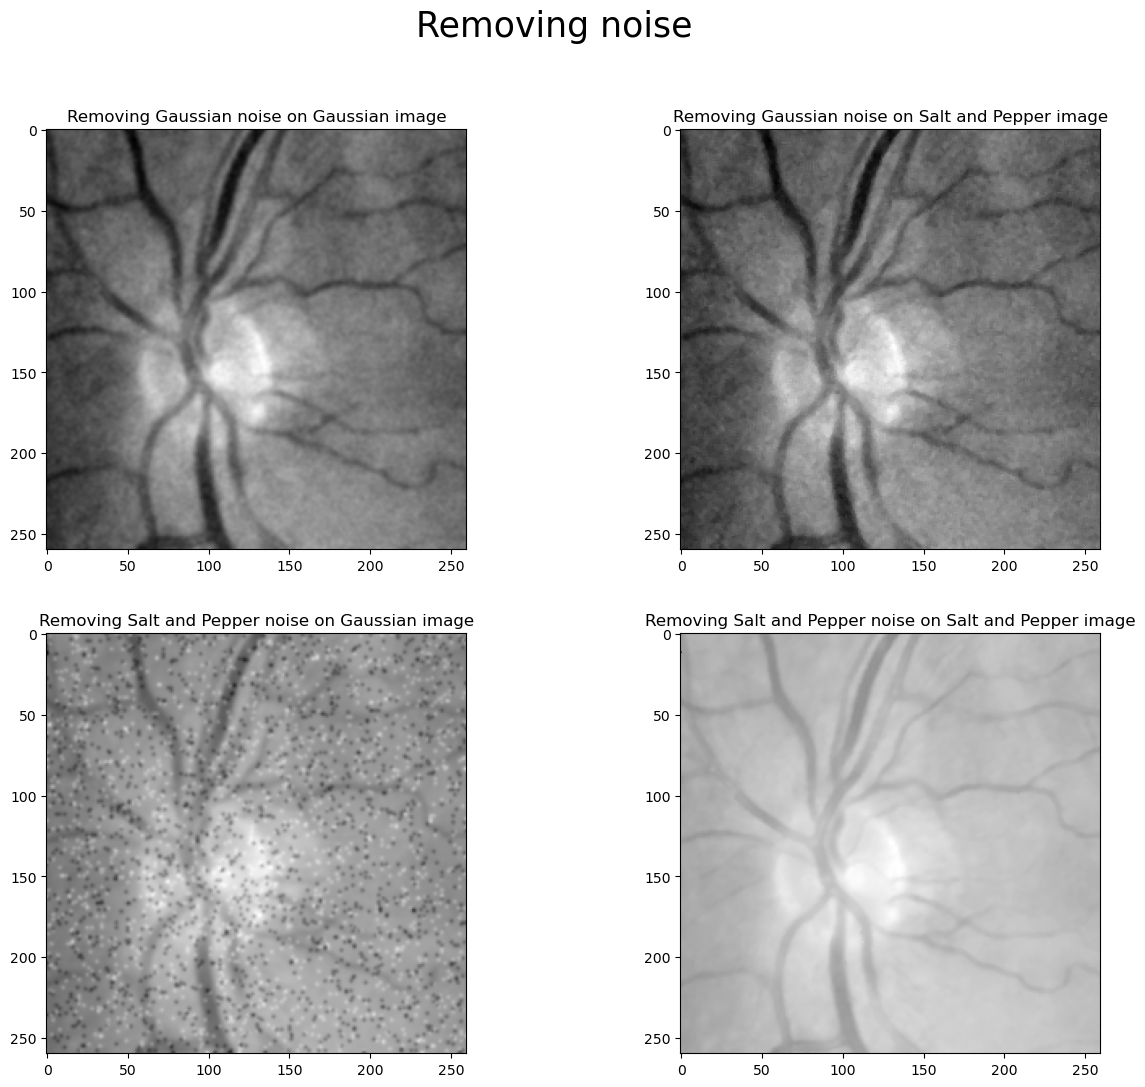

In [67]:
fig, ax = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(15)
fig.suptitle("Removing noise", fontsize=25)

ax[0, 0].imshow(skfl.gaussian(imONestNoiseGauss), cmap="gray")
ax[0, 0].set_title("Removing Gaussian noise on Gaussian image")
ax[0, 1].imshow(skfl.median(sk.img_as_uint(imONestNoiseGauss), skmr.square(3)), cmap="gray")
ax[0, 1].set_title("Removing Gaussian noise on Salt and Pepper image")

ax[1, 0].imshow(skfl.gaussian(imONestNoiseSP), cmap="gray")
ax[1, 0].set_title("Removing Salt and Pepper noise on Gaussian image")
ax[1, 1].imshow(skfl.median(sk.img_as_uint(imONestNoiseSP), skmr.square(3)), cmap="gray")
ax[1, 1].set_title("Removing Salt and Pepper noise on Salt and Pepper image");

### Template Matching

IndexError: boolean index did not match indexed array along dimension 0; dimension is 768 but corresponding boolean dimension is 746

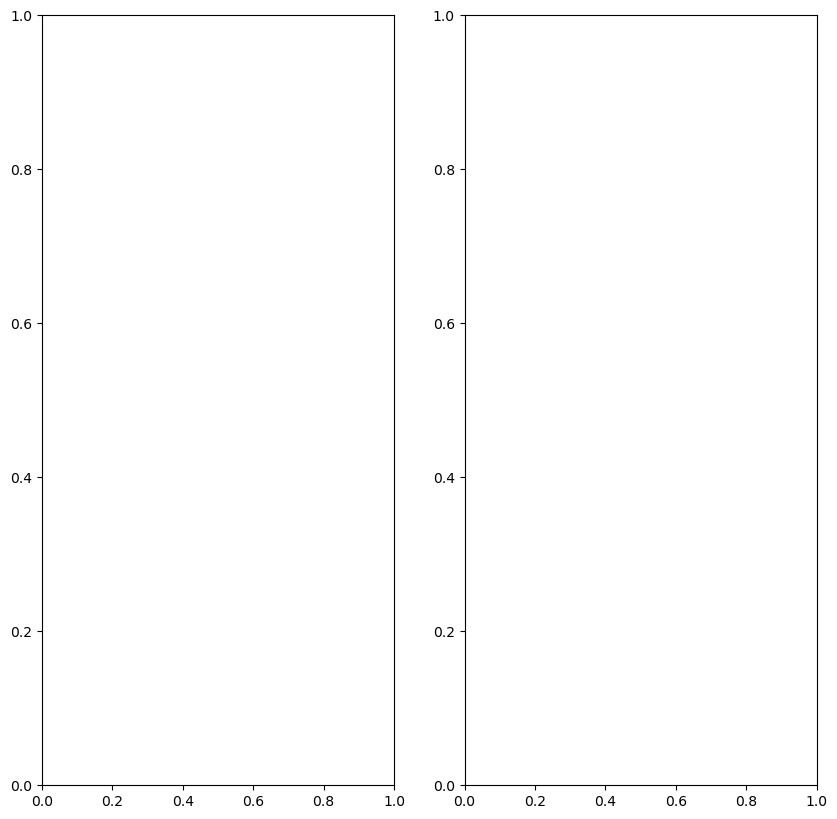

In [86]:
im_wally = skio.imread("data/data/whereiswally.jpg")
im_wally = skcol.rgb2gray(im_wally[:, :, :3], channel_axis=2)
im_wally_template = skio.imread("data/data/wally_template.png")
im_wally_template = skcol.rgb2gray(im_wally_template[:, :, :3], channel_axis=2)

fig, ax = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(10)

im_wally_new = skft.match_template(im_wally, im_wally_template)
x, y = np.unravel_index(np.argmax(im_wally_new), im_wally_new.shape)
mask = im_wally_new == im_wally_new[x, y]
